In [1]:
!pip install mediapipe

import tensorflow as tf
import os
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D
import cv2 as cv
import mediapipe as mp


[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
train_path = "C:/Users/Timii/Documents/Dev/Zummit/fer_data/FER-2013/train"
test_path = "C:/Users/Timii/Documents/Dev/Zummit/fer_data/FER-2013/test"
emotions = os.listdir(train_path)

len_train = {}
len_test = {}

for emotion in emotions:
    file_train = os.listdir(os.path.join(train_path, emotion))
    len_train[emotion] = len(file_train)
    
    file_test = os.listdir(os.path.join(test_path, emotion))
    len_test[emotion] = len(file_test)

print("Train: ", len_train)
print("Test: ", len_test)

total_train = sum(len_train.values())
total_test = sum(len_test.values())

print("Total Train: ", total_train)
print("Total Test: ", total_test)

Train:  {'angry': 3995, 'disgust': 436, 'fear': 4097, 'happy': 7215, 'neutral': 4965, 'sad': 4830, 'surprise': 3171}
Test:  {'angry': 958, 'disgust': 111, 'fear': 1024, 'happy': 1774, 'neutral': 1233, 'sad': 1247, 'surprise': 831}
Total Train:  28709
Total Test:  7178


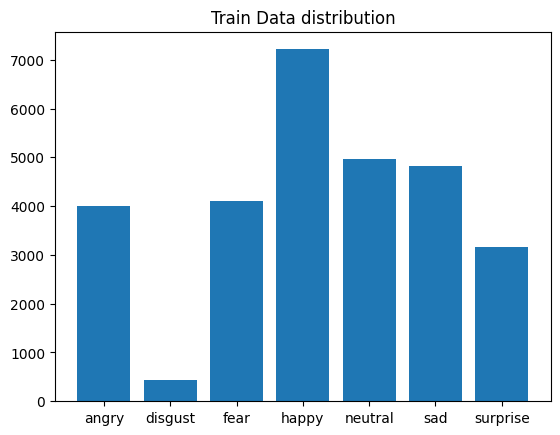

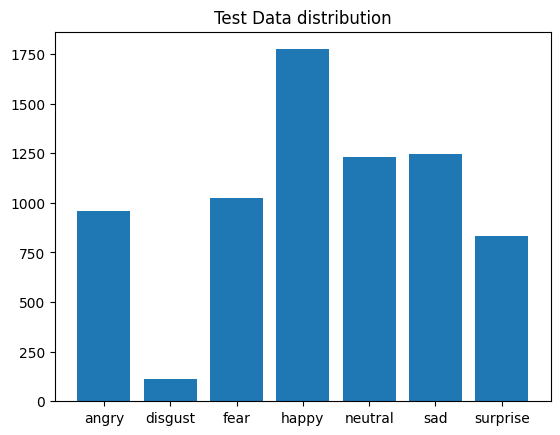

In [3]:
plt.bar(len_train.keys(),len_train.values())
plt.title('Train Data distribution')
plt.show()

plt.bar(len_test.keys(),len_test.values())
plt.title('Test Data distribution')
plt.show()

In [4]:
train_data = {}

for emotion in emotions:
    data_list = os.listdir(os.path.join(train_path, emotion))
    dirr = os.path.join(train_path, emotion)
    train_data[emotion] = np.array([cv.imread(os.path.join(dirr, i), cv.IMREAD_GRAYSCALE) for i in data_list])
    
test_data = {}

for emotion in emotions:
    data_list = os.listdir(os.path.join(test_path, emotion))
    dirr = os.path.join(test_path, emotion)
    test_data[emotion] = np.array([cv.imread(os.path.join(dirr, i), cv.IMREAD_GRAYSCALE) for i in data_list])

KeyboardInterrupt: 

In [ ]:
for emotion in emotions:
    print(f'Train: \n{emotion}: {len(train_data[emotion])}')
print('\n')
for emotion in emotions:
    print(f'Test: \n{emotion}: {len(test_data[emotion])}')

Train: 
angry: 3995
Train: 
disgust: 436
Train: 
fear: 4097
Train: 
happy: 7215
Train: 
neutral: 4965
Train: 
sad: 4830
Train: 
surprise: 3171


Test: 
angry: 958
Test: 
disgust: 111
Test: 
fear: 1024
Test: 
happy: 1774
Test: 
neutral: 1233
Test: 
sad: 1247
Test: 
surprise: 831


In [6]:
im = test_data['angry'][0]

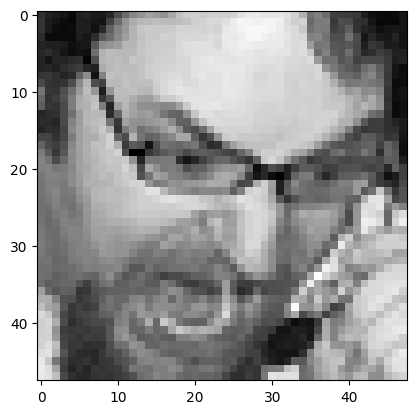

In [7]:
plt.imshow(im, 'gray')

In [8]:
confidence = 0.9
mp_face = mp.solutions.face_detection
face_detector = mp_face.FaceDetection(confidence)


def get_face(image):
    image = cv.cvtColor(image, cv.COLOR_GRAY2RGB)
    results = face_detector.process(image)
    if results.detections:
        for id, detection in enumerate(results.detections):
            h, w, c = image.shape
            bboxC = detection.location_data.relative_bounding_box
            x1, y1, width, height = int(bboxC.xmin*w), int(bboxC.ymin*h), int(bboxC.width*w), int(bboxC.height*h)
            x1, y1 = abs(x1), abs(y1)
            x2, y2 = x1 + width, y1 + height
            face = image[y1:y2, x1:x2]
            face = cv.cvtColor(face, cv.COLOR_RGB2GRAY)
            face = cv.resize(face, (48,48))
            face = np.expand_dims(face, -1)
            if_face = True
    else: 
        face = np.zeros((48,48))
        if_face = False
    return face, if_face


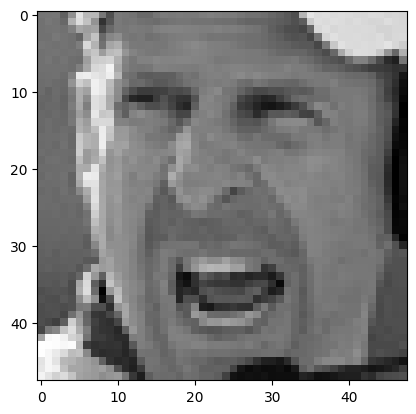

True


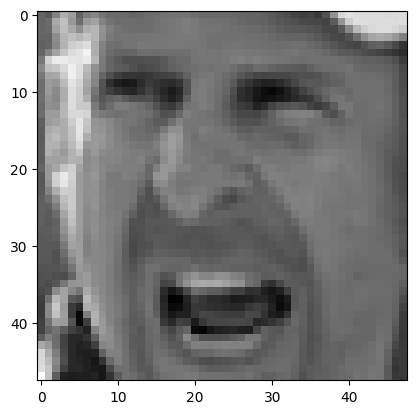

In [9]:
im = test_data['angry'][81]

face, if_face = get_face(im)

plt.imshow(im, 'gray')
plt.show()
print(if_face)
plt.imshow(face, 'gray')
plt.show()

In [10]:
X_test = np.array(np.zeros((48,48,1)))
y_test = []
class_num = 0

for emotion in emotions:
    for image in test_data[emotion]:
        face, if_face = get_face(image)
        if if_face:
            X_test = np.append(X_test, face, axis=2)
            y_test.append(class_num)
    class_num+=1
    

In [11]:
X_test.shape

(48, 48, 6791)

6


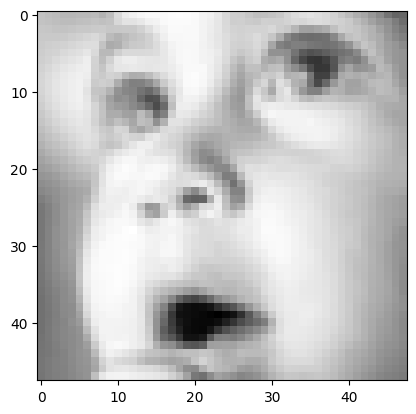

In [12]:
idx = 6784
print(y_test[idx])
plt.imshow(X_test[:,:,idx], 'gray')

In [13]:
X_train = np.array(np.zeros((48,48,1)))
y_train = []
class_num = 0

for emotion in emotions:
    for image in train_data[emotion]:
        face, if_face = get_face(image)
        if if_face:
            X_train = np.append(X_train, face, axis=2)
            y_train.append(class_num)
    class_num+=1
    

In [ ]:
y_train, y_test = np.array(y_train), np.array(y_test)

In [ ]:
y_test.shape

In [ ]:
X_train, X_test = X_train[:,;,1:], X_test[:,;,1:]

In [112]:
y_train, y_test = y_train[], y_test

(48, 48, 791)

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [ ]:
data_augmenter = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
#   tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.2, 0.2),
#     tf.keras.layers.RandomTranslation(0.2, 0.2)
])

In [ ]:
idx=1
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmenter(tf.expand_dims(img[idx], 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

In [ ]:
base_model = tf.keras.applications.MobileNetV3Small(
    input_shape=IMG_SIZE+(3,),
    include_top=False,
    weights="imagenet",
    dropout_rate=0.2,
    include_preprocessing=True,
)

base_model.trainable = False 

In [ ]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

In [ ]:
base_model.summary()

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

In [51]:
prediction_layer = tf.keras.layers.Dense(7, activation='softmax')
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(256, 7)


In [52]:
inputs = tf.keras.Input(shape=(IMG_SIZE+(3,))) 
x = data_augmenter(inputs)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [53]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 sequential_4 (Sequential)   (None, 96, 96, 3)         0         
                                                                 
 MobilenetV3small (Functiona  (None, 3, 3, 576)        939120    
 l)                                                              
                                                                 
 global_average_pooling2d_4   (None, 576)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_3 (Dropout)         (None, 576)               0         
                                                                 
 dense_3 (Dense)             (None, 7)                 4039

In [ ]:
base_learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

initial_epochs = 10
history = model.fit(train_dataset, validation_data=test_dataset, epochs=initial_epochs)

Epoch 1/10
113/113 [==============================] - 436s 4s/step - loss: 1.8077 - accuracy: 0.2952 - val_loss: 1.6098 - val_accuracy: 0.3814
Epoch 2/10
113/113 [==============================] - 420s 4s/step - loss: 1.6364 - accuracy: 0.3652 - val_loss: 1.5526 - val_accuracy: 0.4005
Epoch 3/10
105/113 [==========================>...] - ETA: 29s - loss: 1.5860 - accuracy: 0.3846

In [ ]:
model.save('emotionNet.h5')

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
base_model.trainable = True
print("Number of layers in the base model: ", len(base_model.layers))

fine_tune_at = 100


for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False
    
loss_function=tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(0.1*base_learning_rate)
metrics= ['accuracy']

model.compile(loss=loss_function,
              optimizer = optimizer,
              metrics=metrics)


In [ ]:
model.summary()

In [ ]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=test_dataset)              


In [ ]:
model.save('emotionNet.h5')

In [ ]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()